In [16]:
from datasets import load_dataset

# Load dataset directly from Hugging Face
math_verify_stratos = load_dataset("mlfoundations-dev/math_stratos_scale_verified_with_hf", split="train")
math_verify_stratos_with_difficulty = load_dataset("mlfoundations-dev/math_stratos_scale_judged_and_annotated_with_difficulty", split="train")

# Convert to pandas DataFrame if needed
math_verify_stratos_df = math_verify_stratos.to_pandas()
math_verify_stratos_with_difficulty_df = math_verify_stratos_with_difficulty.to_pandas()
math_verify_stratos_df.head()

,problem,reasoning,deepseek_solution,ground_truth_solution,correct,judge_reasoning,extracted_answer,extracted_gold,verifier_label,error
0,"Let \( a, b, c \) be positive real numbers. Pr...","Okay, so I need to prove this inequality: \(\f...",To prove the inequality \n\n\[\n\frac{1}{a(1+b...,1. Consider the given inequality:\n\n\[\n\frac...,True,The provided solution correctly demonstrates t...,['1/(c*(a + 1)) + 1/(b*(c + 1)) + 1/(a*(b + 1)...,['1/(c*(a + 1)) + 1/(b*(c + 1)) + 1/(a*(b + 1)...,True,
1,A set consists of five different odd positive ...,"Okay, so I need to figure out how many differe...",To determine the number of different sets of f...,\n1. **Observe the Structure of \( N \)**:\n ...,False,The provided solution computes a total of 25 s...,"['25', '25']","['24', '24']",False,
2,"Given real numbers \( a, b, c \) and a positiv...","Okay, let's try to tackle this problem step by...","Given real numbers \(a, b, c\) and a positive ...",\nWe begin by analyzing the function \( f(x) =...,True,Both the provided solution and the ground trut...,"['(3*sqrt(3))/2', '\\frac{3\\sqrt{3}}{2}']","['(3*sqrt(3))/2', '\\frac{3\\sqrt{3}}{2}']",True,
3,"In triangle $ABC$, $CA = CB$, and $D$ is the m...","Okay, so I have this geometry problem here. Le...","In triangle \(ABC\), \(CA = CB\), making it is...",1. **Identify Key Elements**: Consider \( \tri...,True,The provided solution correctly follows the lo...,"['D', 'DE \\cdot DF = DA^2']","['D', 'DE \\cdot DF = DA^2']",True,
4,"Let \( p = 2^{3009}, q = 3^{2006}, \) and \( r...","Okay, so I need to figure out which of the giv...",To determine which of the given statements is ...,"Given the values:\n\[ p = 2^{3009}, \quad q = ...",True,The solution provided correctly follows the st...,"['D', 'D']","['D', 'D']",True,


In [22]:
math_verify_stratos_df.dtypes

problem                  object
reasoning                object
deepseek_solution        object
ground_truth_solution    object
correct                    bool
judge_reasoning          object
extracted_answer         object
extracted_gold           object
verifier_label             bool
error                    object
dtype: object

In [ ]:
math_verify_stratos_with_difficulty_df.head()

In [26]:
math_verify_stratos_df = math_verify_stratos_df.merge(math_verify_stratos_with_difficulty_df[["problem", "difficulty"]], on='problem', how='inner')
math_verify_stratos_df.head()

,problem,reasoning,deepseek_solution,ground_truth_solution,correct,judge_reasoning,extracted_answer,extracted_gold,verifier_label,error,difficulty
0,"Let \( a, b, c \) be positive real numbers. Pr...","Okay, so I need to prove this inequality: \(\f...",To prove the inequality \n\n\[\n\frac{1}{a(1+b...,1. Consider the given inequality:\n\n\[\n\frac...,True,The provided solution correctly demonstrates t...,['1/(c*(a + 1)) + 1/(b*(c + 1)) + 1/(a*(b + 1)...,['1/(c*(a + 1)) + 1/(b*(c + 1)) + 1/(a*(b + 1)...,True,,6
1,A set consists of five different odd positive ...,"Okay, so I need to figure out how many differe...",To determine the number of different sets of f...,\n1. **Observe the Structure of \( N \)**:\n ...,False,The provided solution computes a total of 25 s...,"['25', '25']","['24', '24']",False,,7
2,"Given real numbers \( a, b, c \) and a positiv...","Okay, let's try to tackle this problem step by...","Given real numbers \(a, b, c\) and a positive ...",\nWe begin by analyzing the function \( f(x) =...,True,Both the provided solution and the ground trut...,"['(3*sqrt(3))/2', '\\frac{3\\sqrt{3}}{2}']","['(3*sqrt(3))/2', '\\frac{3\\sqrt{3}}{2}']",True,,9
3,"In triangle $ABC$, $CA = CB$, and $D$ is the m...","Okay, so I have this geometry problem here. Le...","In triangle \(ABC\), \(CA = CB\), making it is...",1. **Identify Key Elements**: Consider \( \tri...,True,The provided solution correctly follows the lo...,"['D', 'DE \\cdot DF = DA^2']","['D', 'DE \\cdot DF = DA^2']",True,,8
4,"Let \( p = 2^{3009}, q = 3^{2006}, \) and \( r...","Okay, so I need to figure out which of the giv...",To determine which of the given statements is ...,"Given the values:\n\[ p = 2^{3009}, \quad q = ...",True,The solution provided correctly follows the st...,"['D', 'D']","['D', 'D']",True,,5


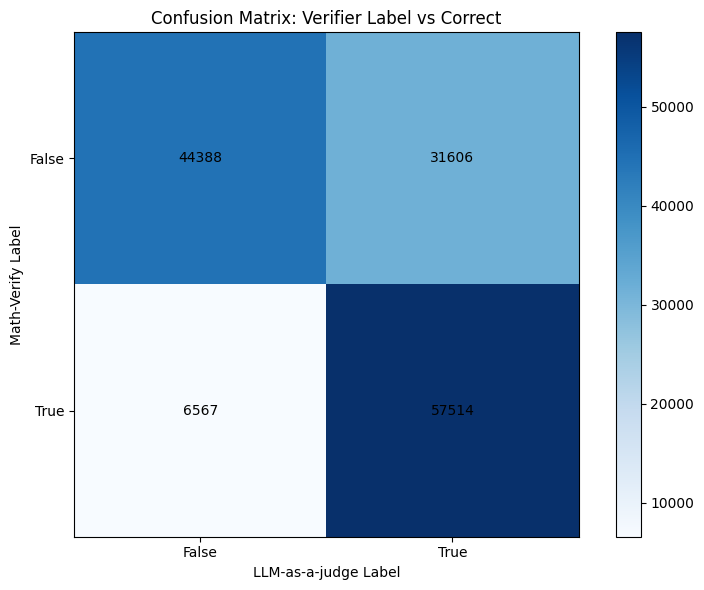

In [27]:
import matplotlib.pyplot as plt

# Create confusion matrix data
conf_matrix = math_verify_stratos_df[['verifier_label', 'correct']]
conf_matrix = pd.crosstab(conf_matrix['verifier_label'], conf_matrix['correct'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
im = plt.imshow(conf_matrix, cmap='Blues')

# Add numbers to each cell
for i in range(len(conf_matrix.index)):
    for j in range(len(conf_matrix.columns)):
        text = plt.text(j, i, conf_matrix.iloc[i, j],
                       ha="center", va="center")

# Add labels and title
plt.colorbar(im)
plt.title('Confusion Matrix: Verifier Label vs Correct')
plt.ylabel('Math-Verify Label')
plt.xlabel('LLM-as-a-judge Label')

# Set tick labels
plt.xticks(range(len(conf_matrix.columns)), conf_matrix.columns)
plt.yticks(range(len(conf_matrix.index)), conf_matrix.index)

plt.tight_layout()

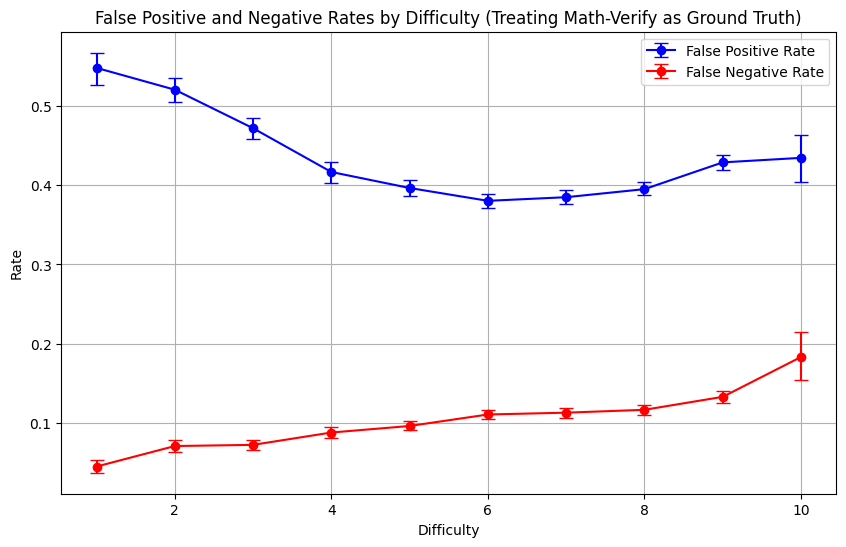

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def bootstrap_rates(data, n_bootstrap=1000):
    n_samples = len(data)
    fpr_boots = []
    fnr_boots = []
    
    for _ in range(n_bootstrap):
        # Bootstrap sample
        boot_idx = np.random.choice(n_samples, size=n_samples, replace=True)
        boot_sample = data.iloc[boot_idx]
        
        # Calculate rates for this bootstrap sample
        TP = sum((boot_sample['verifier_label'] == True) & (boot_sample['correct'] == True))
        TN = sum((boot_sample['verifier_label'] == False) & (boot_sample['correct'] == False))
        FP = sum((boot_sample['verifier_label'] == False) & (boot_sample['correct'] == True))
        FN = sum((boot_sample['verifier_label'] == True) & (boot_sample['correct'] == False))
        
        fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
        fnr = FN / (FN + TP) if (FN + TP) > 0 else 0
        
        fpr_boots.append(fpr)
        fnr_boots.append(fnr)
    
    # Calculate confidence intervals
    fpr_ci = np.percentile(fpr_boots, [2.5, 97.5])
    fnr_ci = np.percentile(fnr_boots, [2.5, 97.5])
    
    return fpr_ci, fnr_ci

# Calculate rates and confidence intervals for each difficulty level
results = []
for diff in sorted(math_verify_stratos_df['difficulty'].unique()):
    subset = math_verify_stratos_df[math_verify_stratos_df['difficulty'] == diff]
    
    # Calculate point estimates
    TP = sum((subset['verifier_label'] == True) & (subset['correct'] == True))
    TN = sum((subset['verifier_label'] == False) & (subset['correct'] == False))
    FP = sum((subset['verifier_label'] == False) & (subset['correct'] == True))
    FN = sum((subset['verifier_label'] == True) & (subset['correct'] == False))
    
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    FNR = FN / (FN + TP) if (FN + TP) > 0 else 0
    
    # Calculate confidence intervals
    fpr_ci, fnr_ci = bootstrap_rates(subset)
    
    results.append({
        'difficulty': diff,
        'FPR': FPR,
        'FNR': FNR,
        'FPR_low': fpr_ci[0],
        'FPR_high': fpr_ci[1],
        'FNR_low': fnr_ci[0],
        'FNR_high': fnr_ci[1]
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot FPR with error bars
plt.errorbar(results_df['difficulty'], results_df['FPR'], 
            yerr=[results_df['FPR'] - results_df['FPR_low'], 
                  results_df['FPR_high'] - results_df['FPR']],
            fmt='bo-', label='False Positive Rate', capsize=5)

# Plot FNR with error bars
plt.errorbar(results_df['difficulty'], results_df['FNR'],
            yerr=[results_df['FNR'] - results_df['FNR_low'],
                  results_df['FNR_high'] - results_df['FNR']],
            fmt='ro-', label='False Negative Rate', capsize=5)

plt.xlabel('Difficulty')
plt.ylabel('Rate')
plt.title('False Positive and Negative Rates by Difficulty (Treating Math-Verify as Ground Truth)')
plt.legend()
plt.grid(True)
plt.show()

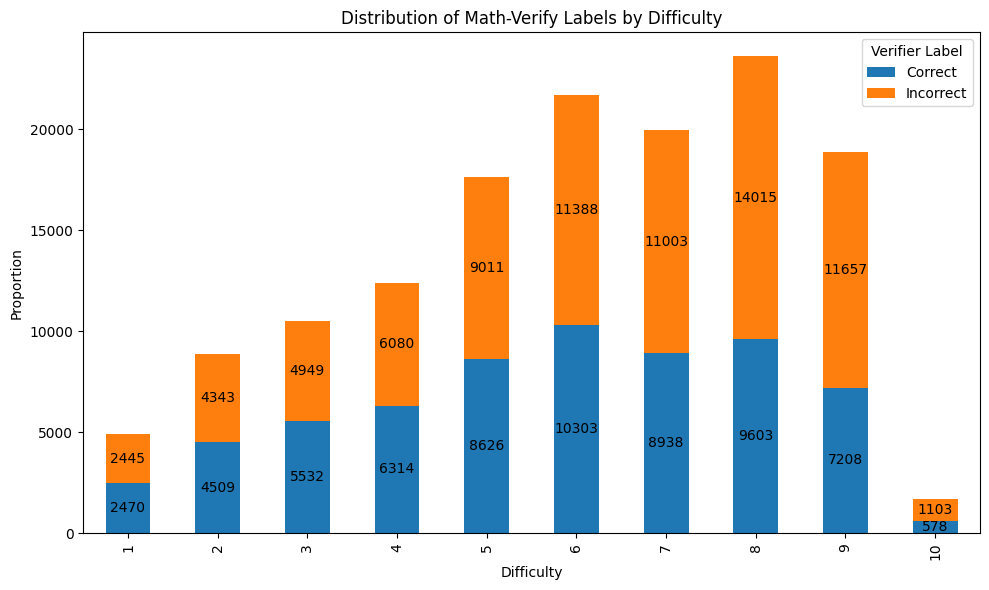


Sample counts per difficulty level:
difficulty
1      4915
2      8852
3     10481
4     12394
5     17637
6     21691
7     19941
8     23618
9     18865
10     1681
dtype: int64


In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate counts for each difficulty level
math_verify_stratos_df["verifier_label_parsed"] = math_verify_stratos_df["verifier_label"].apply(lambda x: "Correct" if x else "Incorrect")
counts = math_verify_stratos_df.groupby('difficulty')['verifier_label_parsed'].value_counts().unstack()

# Create the stacked bar plot
ax = counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Distribution of Math-Verify Labels by Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Proportion')
plt.legend(title='Verifier Label')

# Add percentage labels on the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Print the actual counts (optional)
print("\nSample counts per difficulty level:")
print(math_verify_stratos_df.groupby('difficulty').size())